 IMPORTING LIBRARIES

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

df = pd.read_csv('data.csv')
df.info()

In [3]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis',axis=1), df['diagnosis'], test_size=0.30, random_state=101)

Let us create a SVC model with the default parameters:

In [6]:
from sklearn.svm import SVC
SV_model = SVC()
SV_model.fit(X_train,y_train)


SVC()

In [7]:
predictions = SV_model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[102   3]
 [ 10  56]]


              precision    recall  f1-score   support

           B       0.91      0.97      0.94       105
           M       0.95      0.85      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



Finding the optimal parameters for SVC using GridSearch

In [8]:
parameters_grid = {'C': [0.01,0.1,1, 10, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
SV_grid = GridSearchCV(SVC(),parameters_grid,refit=True,verbose=3)
SV_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf

[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.613 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.937 total time=   0.0s
[CV 5/5] END .....C=10, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [9]:
SV_grid.best_params_
SV_grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [10]:
grid_predictions = SV_grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[101   4]
 [  7  59]]


              precision    recall  f1-score   support

           B       0.94      0.96      0.95       105
           M       0.94      0.89      0.91        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('diagnosis',axis=1))

StandardScaler()

In [12]:
scaled_features = scaler.transform(df.drop('diagnosis',axis=1))
df_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [13]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_features,df['diagnosis'],
                                                    test_size=0.30, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_train1,y_train1)
KNN_predictions = KNN_model.predict(X_test1)

print(confusion_matrix(y_test1,KNN_predictions))
print('\n')
print(classification_report(y_test1,KNN_predictions))


[[102   3]
 [  5  61]]


              precision    recall  f1-score   support

           B       0.95      0.97      0.96       105
           M       0.95      0.92      0.94        66

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
error_rate = []

for i in range(1,40):
    
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train1,y_train1)
    pred_i = KNN_model.predict(X_test1)
    error_rate.append(np.mean(pred_i != y_test1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

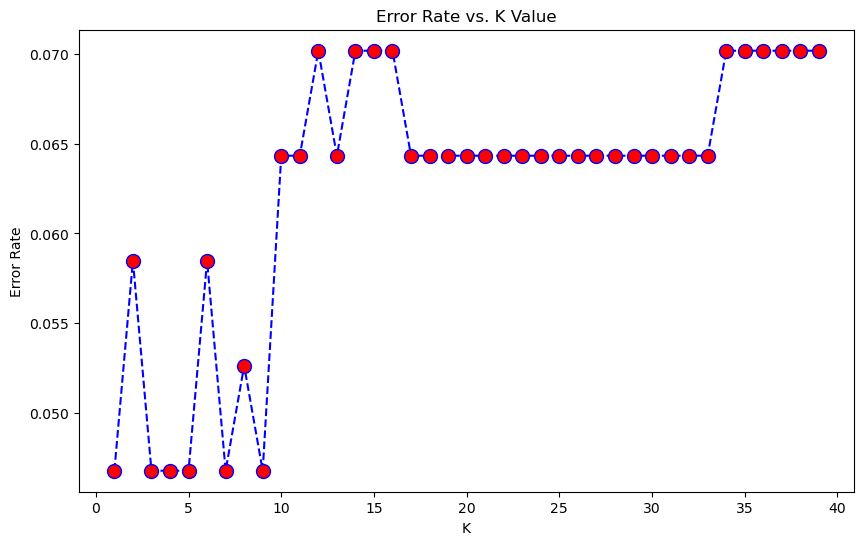

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We observe that the values K=1,3,4,5,7,9 have very low error rate. So we will choose the lowest value higher than K=1, which is K=3 and create our optimized KNN model:

In [17]:
KNN_model = KNeighborsClassifier(n_neighbors=3)

KNN_model.fit(X_train1,y_train1)
KNN_predictions = KNN_model.predict(X_test1)

print(confusion_matrix(y_test1,KNN_predictions))
print('\n')
print(classification_report(y_test1,KNN_predictions))

[[104   1]
 [  7  59]]


              precision    recall  f1-score   support

           B       0.94      0.99      0.96       105
           M       0.98      0.89      0.94        66

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


We used SVM and KNN algorithms to predict whether an instance of a breast tumor is benign or malignant. In the process, we created models with default parameters and then used techniques to optimize them.

Due to the medical nature of the dataset, we stressed on the importance of having high accuracy but also low false negative (FN) predictions, as this would save lives. We conclude that the KNN model with K=3 is the optimal classification model for the Wisconsin breast cancer dataset (at least out of the models considered in this notebook), with an average accuracy of 0.96, a Malignant precision of 0.98 and only 1 FN prediction.